In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [14]:
# Define random seed
SEED = 42

# Define the base folder
PATH = '/home/erf6575/Documents/neural_adult/'

In [15]:
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]
df = pd.read_csv(PATH+"data/adult.data", header=None, names=column_names, na_values="?", skipinitialspace=True)
print(df.isnull().sum())
df

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [16]:
# Remove education, the information is encoded in education_num
# Remove native_country, I'm not interested in country information
df.drop(columns=['education', 'native_country'], inplace=True)

# Replace sex, this can be changed to a binary
df['sex'] = df['sex'].replace({'Female': False, 'Male': True})

# Replace sex, this can be changed to a binary
df['income'] = df['income'].replace({'<=50K': False, '>50K': True})

df.fillna("Unknown", inplace=True)
print(df.isnull().sum())

# Change the categorial columns to dummy columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
oth_cols = df.select_dtypes(exclude=['object', 'category']).columns
cleaned_df = pd.get_dummies(df, columns=cat_cols)

print(cleaned_df)


age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
income            0
dtype: int64
       age  fnlwgt  education_num    sex  capital_gain  capital_loss  \
0       39   77516             13   True          2174             0   
1       50   83311             13   True             0             0   
2       38  215646              9   True             0             0   
3       53  234721              7   True             0             0   
4       28  338409             13  False             0             0   
...    ...     ...            ...    ...           ...           ...   
32556   27  257302             12  False             0             0   
32557   40  154374              9   True             0             0   
32558   58  151910              9  False             0             0   
32559  

/tmp/ipykernel_99044/1040187635.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'Female': False, 'Male': True})
/tmp/ipykernel_99044/1040187635.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income'] = df['income'].replace({'<=50K': False, '>50K': True})


In [17]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   32561 non-null  int64
 1   fnlwgt                                32561 non-null  int64
 2   education_num                         32561 non-null  int64
 3   sex                                   32561 non-null  bool 
 4   capital_gain                          32561 non-null  int64
 5   capital_loss                          32561 non-null  int64
 6   hours_per_week                        32561 non-null  int64
 7   income                                32561 non-null  bool 
 8   workclass_Federal-gov                 32561 non-null  bool 
 9   workclass_Local-gov                   32561 non-null  bool 
 10  workclass_Never-worked                32561 non-null  bool 
 11  workclass_Private                     325

In [21]:
cleaned_df.to_csv(PATH+"data/adult_cleaned.csv", index=False)

### EDA

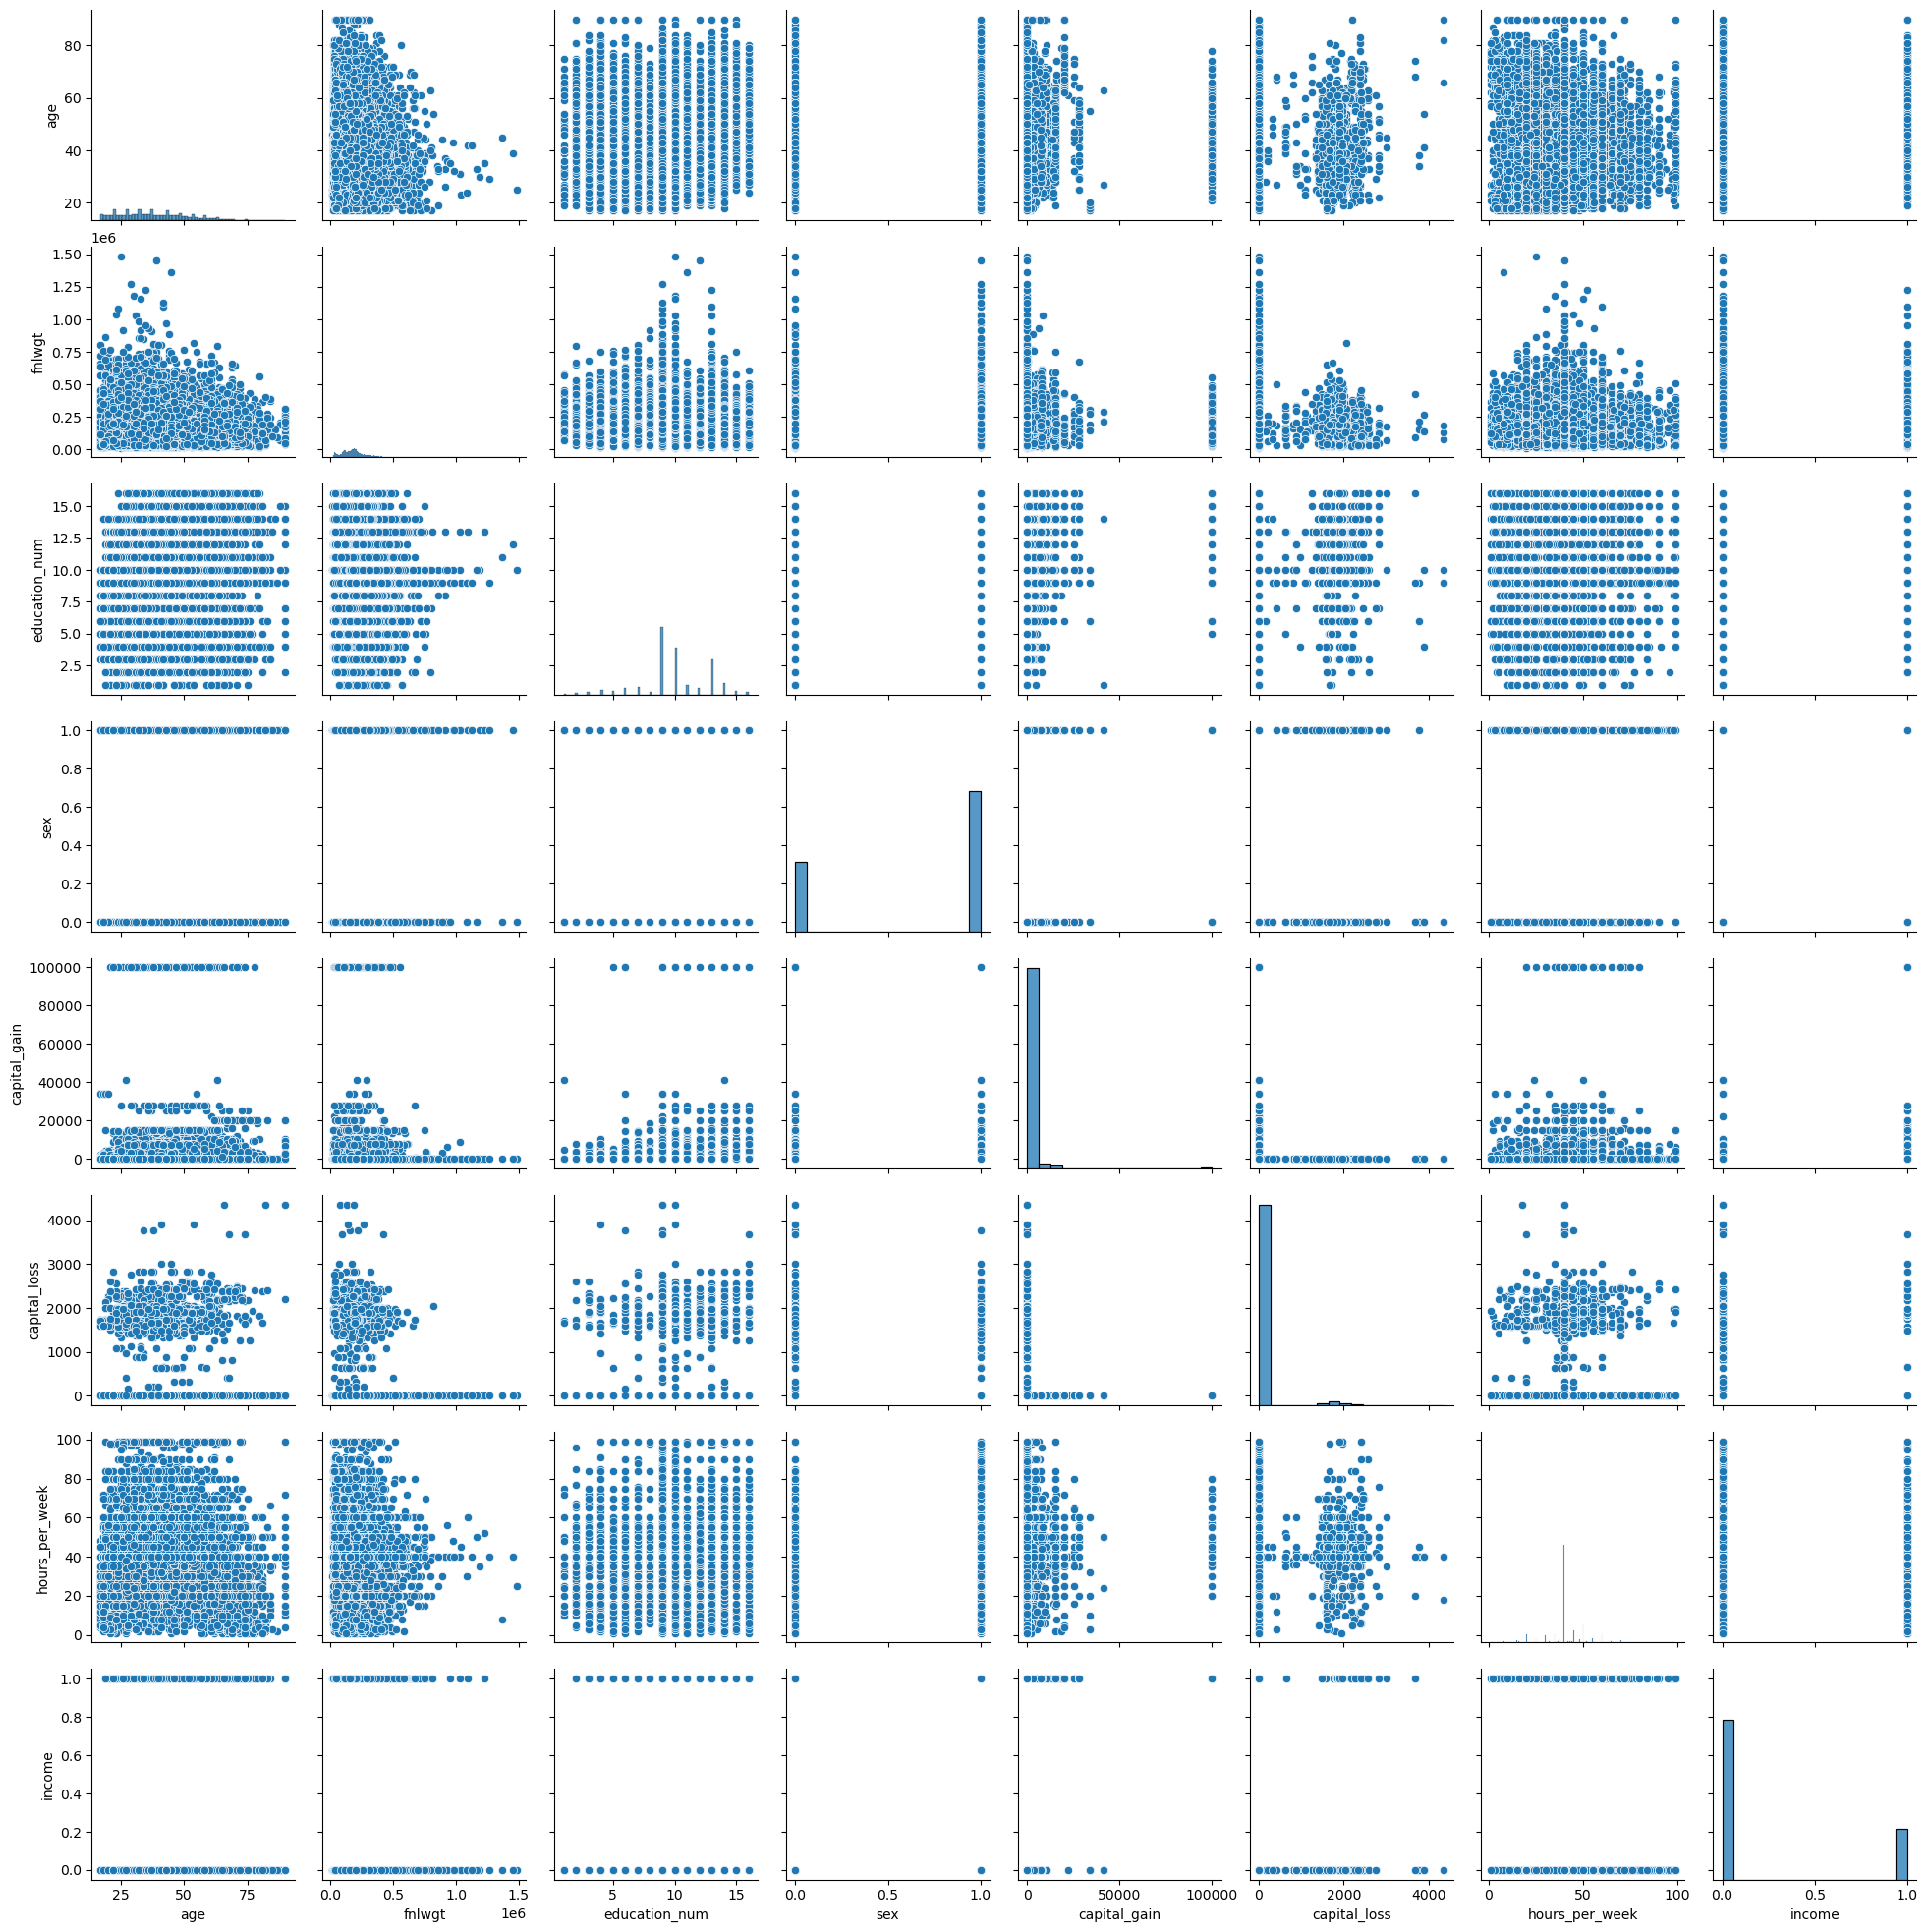

In [19]:
sns.pairplot(df[oth_cols])

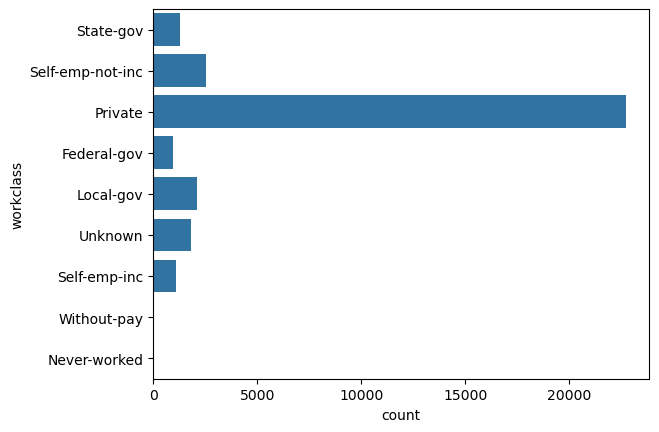

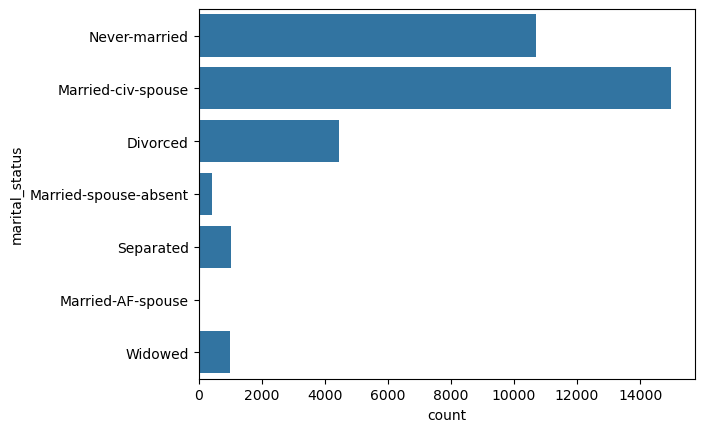

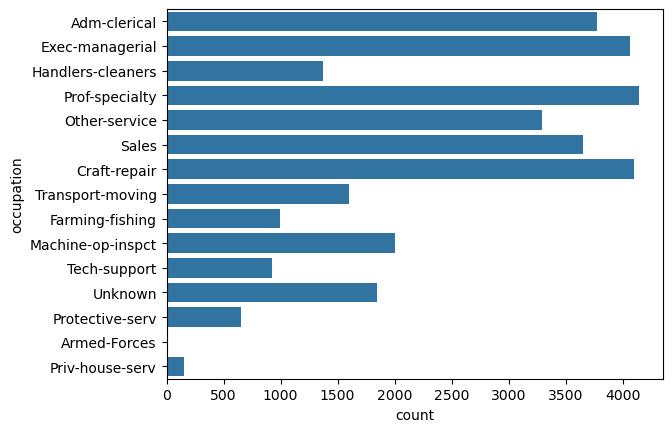

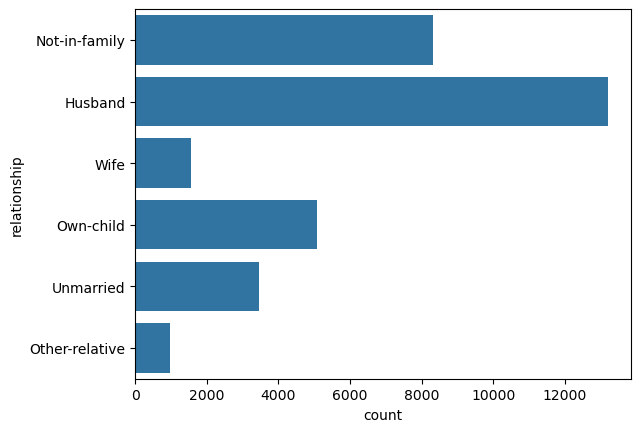

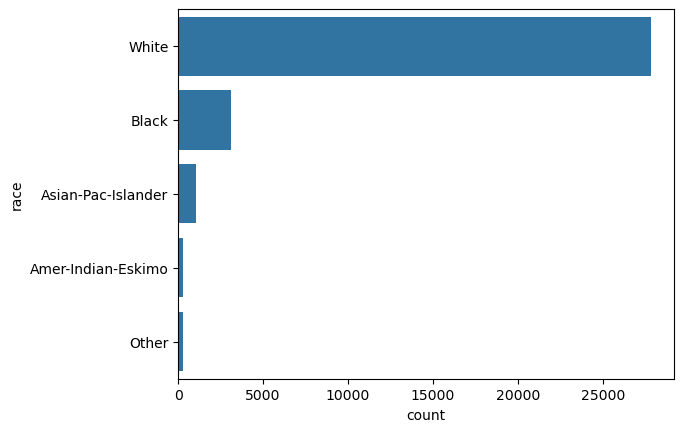

In [20]:
for col in cat_cols:
    sns.countplot(y=col, data=df)
    plt.show()